<div style="text-align: center; padding: 20px; background-color: #000000; border-radius: 10px; margin: 20px 0;">
    <h1 style="color: #008080 	;">Monte Carlo Simulation</h1>
    <hr style="border: 2px solid #008080;">
</div>

Monte Carlo Simulation is a computational technique used to approximate the behavior of complex systems or processes through repeated random sampling. This method involves running numerous simulations using random inputs to estimate the probability distributions of possible outcomes. It's particularly useful when analytical solutions are difficult or impossible to obtain.  
The objective of this section is learning more about Monte Carlo Simulation and understand how it can
help us to model and analyze complex systems. We will simulate the following topics using Monte Carlo Simulation:
1. **Pi Calculation**
2. **Calculation the probability of wining for each player in Mensch game**

<style>
h2 {
        /* green code */
        color: #3EB489;
}
</style>

## Pi Calculation

Pi is a mathematical constant that represents the ratio of a circle's circumference to its diameter. In this case, we can use the Monte Carlo method to estimate Pi by simulating random points on a square and counting the number of points that fall inside a circle with radius 1. The ratio of the number of points inside the circle to the total number of points is an estimate of $\frac{\pi r^{2}}{(2r)^{2}} = \frac {\pi}{4}$.

In [1]:
import numpy as np

NUM_OF_SIMULATIONS = 1000000

number_of_points_inside_circle = 0
number_of_points_inside_square = 0

for i in range(NUM_OF_SIMULATIONS):
    x = np.random.uniform()
    y = np.random.uniform()
    if x**2 + y**2 <= 1:
        number_of_points_inside_circle += 1
    number_of_points_inside_square += 1

pi = 4 * number_of_points_inside_circle / number_of_points_inside_square

print("The estimation of Pi using Monte Carlo Simulation is: ", pi)

The estimation of Pi using Monte Carlo Simulation is:  3.143072


As we can see, the estimation of Pi is very close to the real value. The more points we use, the closer the estimation will be to the real value.

<style>
h2 {
        /* green code */
        color: #3EB489;
}
</style>

## Probability of wining in Mensch Game

The analysis of the probability of winning in a simplified Mensch game is done in this part. The game consists of a board with 40 spaces, and the goal is to move the only piece each player has from the start to the end. The start and end spaces differ for each player. The game is played with a dice, and the player can move the piece the number of spaces that the dice shows. The game has some special rules, like the possibility of eating the opponent's piece if it lands on the same space. Also for bringing the piece to the start space, the player needs to roll a 6. The probability of winning is calculated by simulating the game many times and counting the number of wins for each player.

At first we define `starting_positions` and `wining_positions` for each player. The `positions` list is used to store the position of each piece. It is initialized with -1, which means that the player has not rolled a 6 yet.   
In `throw_out_if_possible()` function, the piece is thrown out if it's possible. If the piece is thrown out, the position is updated to -1.
`change_position()` function is used to change the position of the piece. It also checks if the piece reaches the wining position. If it does, the function returns the player who won, Otherwise, it returns -1. If the piece's new position goes further than the last field in the "home" row, the piece does not move.  
`play_game()` function is used to simulate the game. It returns the player who won the game. The 'while' loop is used to simulate the game until one of the players wins.  
In the end we simulate the game 100000 times and calculate the probability of winning for each player.


Player  1  winning probability is:  0.2641
Player  2  winning probability is:  0.257
Player  3  winning probability is:  0.2406
Player  4  winning probability is:  0.2383


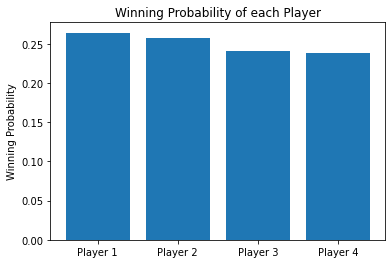

In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np

NUM_OF_PLAYERS = 4
NUM_OF_SIMULATIONS = 10000
BOARD_SIZE = 4000

def roll_dice():
    return random.randint(1, 6)

def throw_out_if_possible(positions, i):
    for j in range(NUM_OF_PLAYERS):
        if (i != j) and (positions[j] != -1):
            a = positions[i] == positions[j]
            b = ((positions[i] >= BOARD_SIZE) and (positions[i] - BOARD_SIZE == positions[j]))
            c = ((positions[j] >= BOARD_SIZE) and (positions[j] - BOARD_SIZE == positions[i]))
            if a or b or c:             
                positions[j] = -1

def change_position(positions, starting_positions, wining_positions, i, dice):
    if positions[i] == -1 and dice == 6:
        positions[i] = starting_positions[i]
        throw_out_if_possible(positions, i)
    elif positions[i] != -1:
        new_position = positions[i] + dice
        if new_position <= wining_positions[i]:
            positions[i] = new_position
            if (positions[i] == wining_positions[i]):
                return i
            throw_out_if_possible(positions, i)
    return -1

def play_dice_as_long_as_6(dice, positions, starting_positions, wining_positions, i):
    dice_ = dice
    while dice_ == 6:
        winner = change_position(positions, starting_positions, wining_positions, i, dice_)
        if winner != -1:
            return winner
        dice_ = roll_dice()
    winner = change_position(positions, starting_positions, wining_positions, i, dice_)
    return winner
                
def play_game(positions, starting_positions, wining_positions):
    while(True):
        winner = -1 
        for i in range(NUM_OF_PLAYERS):
            dice = roll_dice()
            if (dice != 6) and (positions[i] == -1):
                continue
            if dice == 6:
                winner = play_dice_as_long_as_6(dice, positions, starting_positions, wining_positions, i)
            else:
                winner = change_position(positions, starting_positions, wining_positions, i, dice)
            if winner != -1:
                return winner


number_of_wins = [0] * NUM_OF_PLAYERS
starting_positions = [(BOARD_SIZE/NUM_OF_PLAYERS)*(i) for i in range(NUM_OF_PLAYERS)]
wining_positions = [(BOARD_SIZE/NUM_OF_PLAYERS)*(i+NUM_OF_PLAYERS) for i in range(NUM_OF_PLAYERS)]

for i in range(NUM_OF_SIMULATIONS):
    positions = [-1] * NUM_OF_PLAYERS
    winner = play_game(positions, starting_positions, wining_positions)
    number_of_wins[winner] += 1
    
total_games_count = sum(number_of_wins)
winning_probabilities = [wins / total_games_count for wins in number_of_wins]

for i in range(NUM_OF_PLAYERS):
    print("Player ", i+1, " winning probability is: ", winning_probabilities[i])

x = np.arange(NUM_OF_PLAYERS)
plt.bar(x, winning_probabilities)
plt.xticks(x, ('Player 1', 'Player 2', 'Player 3', 'Player 4'))
plt.ylabel('Winning Probability')
plt.title('Winning Probability of each Player')
plt.show()

As we can see, the probability of winning is very close to 0.25 for each player. Thث wining probability increases for the players who start sooner, but the difference is very small. We assume that the reason for this is that the first players have a higher chance of starting the game sooner and thus have a higher chance of winning. If we increase the board size, the probability of winning will be closer to 0.25 for each player. In this case, the significance of the starting position will decrease.

**1. Read a little bit about the applications of Monte Carlo Simulation in real life. What are
some of these applications?**  

Monte Carlo simulations are used in many real-world situations. Here are some areas:  
- Finance: A Monte Carlo simulation can be used to consider all the possible ups and downs of the market, giving you a better idea of how risky an investment might be. It also can be used in financial modeling, especially for pricing derivatives, and simulating stock prices.  
- Insurance: Monte Carlo simulations are used for assessing risks. Setting premiums is also done using Monte Carlo simulation. Evaluation the likelihood of different events such as natural disasters or accidents is done by simulating various scenarios.  
- Science & Health Care: Scientists use Monte Carlo simulations to model things such as spread of diseases, and optimizing healthcare resource allocation. It's a good alternative for complicated systems that would be challenging or costly to experiment with in physical reality.
- Telecommunications: Network planning, capacity optimization, and assessing the performance of communication systems under conditions such as traffic fluctuations or equipment failures are done by companies using Monte Carlo simulations.
- Project Management: Estimating project durations, costs, and risks and also identifying critical activities, resource allocation, and optimizing project schedules is done with the help of Monte Carlo simulations.
- Engineering: Monte Carlo simulations are used to model the behavior of various systems, such as the flow of fluids, the strength of materials, and the reliability of systems. It's also used in the design of experiments and optimization of systems.

<!-- style only for h2 -->
<style>
h3 {
        /* cyan code */
        /* background-color: #008B8B; */
        /* cyan code */
        color: #008B8B;
}


p {
    color: #FFFFFF;
    font-size: 16px;
    margin-bottom: 10px;
}

</style>

### **Question 1: Read a little bit about the applications of Monte Carlo Simulation in real life. What are some of these applications?

`Monte Carlo simulations are used in many real-world situations. Here are some areas:` 
- `Finance: A Monte Carlo simulation can be used to consider all the possible ups and downs of the market, giving you a better idea of how risky an investment might be. It also can be used in financial modeling, especially for pricing derivatives, and simulating stock prices.` 
- `Insurance: Monte Carlo simulations are used for assessing risks. Setting premiums is also done using Monte Carlo simulation. Evaluation the likelihood of different events such as natural disasters or accidents is done by simulating various scenarios.`
- `Science & Health Care: Scientists use Monte Carlo simulations to model things such as spread of diseases, and optimizing healthcare resource allocation. It's a good alternative for complicated systems that would be challenging or costly to experiment with in physical reality.`
- `Telecommunications: Network planning, capacity optimization, and assessing the performance of communication systems under conditions such as traffic fluctuations or equipment failures are done by companies using Monte Carlo simulations.`
- `Project Management: Estimating project durations, costs, and risks and also identifying critical activities, resource allocation, and optimizing project schedules is done with the help of Monte Carlo simulations.`
- `Engineering: Monte Carlo simulations are used to model the behavior of various systems, such as the flow of fluids, the strength of materials, and the reliability of systems. It's also used in the design of experiments and optimization of systems.`


